In [18]:
import pandas as pd

cod_data = pd.read_csv('cod.csv')

# Call of Duty dataset
Källa: https://www.kaggle.com/code/pouyashiri/cod-player-clustering

Vi kan börja vår analysav datasetet genom att titta på första och sista datapunkterna, samt en allmän sammanfattning av metadatan:

In [19]:
cod_data.head()


,name,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
0,RggRt45#4697369,0,0,0.00000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0
1,JohniceRex#9176033,0,0,0.00000,0,1,0,110,0,7,0,7.0,0,0,0,700,0.0,0,16
2,bootybootykill#1892064,0,66,1.03125,0,9,0,110,0,32,16,32.0,0,1,0,48300,0.0,0,64
3,JNaCo#5244172,3,2,0.40000,0,1,0,0,0,3,0,3.0,0,0,0,1150,0.0,0,5
4,gomezyayo_007#6596687,0,2,0.20000,0,1,0,110,0,5,1,5.0,0,0,0,1000,0.0,0,10


In [20]:
cod_data.tail()

,name,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
1553,ImranePROPG#2085215,0,51,0.432203,0,10,0,110,0,71,11,71.0,0,0,0,49935,0.0,0,118
1554,Miguel_mor#1492856,0,0,0.000000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0
1555,Trianthor#3462590,0,0,0.000000,0,1,0,0,0,0,0,0.0,0,0,0,0,0.0,0,0
1556,tinytrex594#3976133,0,0,0.000000,0,1,0,0,2,1,0,1.0,0,1,7,0,91.2,9,0
1557,TomasFJ_05#2711069,1,35,0.686275,3,5,1,110,17,10,6,10.0,1,11,63,17126,39.0,80,51


In [21]:
cod_data.describe()

,wins,kills,kdRatio,killstreak,level,losses,prestige,hits,timePlayed,headshots,averageTime,gamesPlayed,assists,misses,xp,scorePerMinute,shots,deaths
count,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1558.000000,1.558000e+03,1558.000000,1.558000e+03,1558.000000
mean,153.002567,3753.001926,0.637098,6.895379,44.414634,4.998074,47.657253,10330.189987,425.915918,630.672657,21.428416,116.695764,685.797176,45356.671374,8.726335e+05,107.868825,5.568677e+04,3875.397946
std,301.984766,7929.696675,0.430459,10.184677,68.318064,7.005778,51.626213,22954.104384,786.182499,1305.150393,82.640000,256.354836,1518.383825,97919.428339,1.795755e+06,116.526676,1.202811e+05,7992.666443
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,0.000000,4.000000,0.261442,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.106250e+03,0.000000,0.000000e+00,14.000000
50%,10.000000,191.500000,0.732837,5.000000,11.000000,2.000000,14.000000,214.500000,51.000000,32.000000,3.031116,3.000000,36.500000,1307.500000,6.396800e+04,56.793995,1.565000e+03,269.000000
75%,168.000000,3445.750000,0.955293,12.000000,51.000000,8.000000,110.000000,9015.500000,485.500000,602.750000,9.085714,110.500000,609.750000,40906.750000,8.286690e+05,221.648976,5.078100e+04,3698.750000
max,3519.000000,66935.000000,3.000000,235.000000,435.000000,80.000000,117.000000,209851.000000,7479.000000,11719.000000,1349.000000,3745.000000,14531.000000,965775.000000,1.497054e+07,413.800000,1.166620e+06,67888.000000


In [22]:
cod_data.count()

name              1558
wins              1558
kills             1558
kdRatio           1558
killstreak        1558
level             1558
losses            1558
prestige          1558
hits              1558
timePlayed        1558
headshots         1558
averageTime       1558
gamesPlayed       1558
assists           1558
misses            1558
xp                1558
scorePerMinute    1558
shots             1558
deaths            1558
dtype: int64

Det kan vara spännande att se hur spelarna presterar baserat på deras nivå (level):

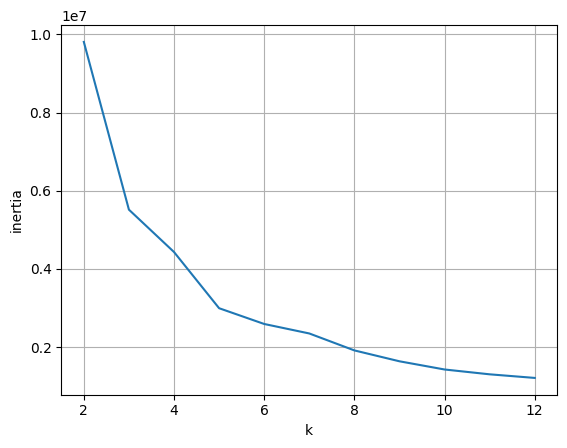

In [23]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from numpy._typing import ArrayLike


def cluster_2d(df: pd.DataFrame, col1: str, col2: str, k: int) -> None:
    subset = get_subset(df, col1, col2)
    clusters = KMeans(n_clusters = k, random_state = 309).fit_predict(subset)
    plot_2d_clusters(df, col1, col2, k, clusters)


def plot_2d_clusters(df: pd.DataFrame, x: str, y: str, k: int, cluster_array: ArrayLike) -> None:
    for cluster in range(k):
        plt.scatter(df.loc[cluster_array == cluster, x],
                    df.loc[cluster_array == cluster, y])
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()


def find_kmeans(df: pd.DataFrame, max_k: int = 10) -> None:
    k_range = range(2, max_k + 1)
    inertias: list[float] = []
    for k in k_range:
        kmeans = KMeans(n_clusters = k, random_state = 309).fit(df)
        inertias.append(kmeans.inertia_)
    
    plt.plot(k_range, inertias)
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.grid()
    plt.show()


def get_subset(df: pd.DataFrame, *cols: str) -> pd.DataFrame:
    subset = pd.DataFrame(pd.concat((df[col] for col in cols), axis = 1))
    return subset


subset = get_subset(cod_data, 'level', 'scorePerMinute')
find_kmeans(subset, 12)


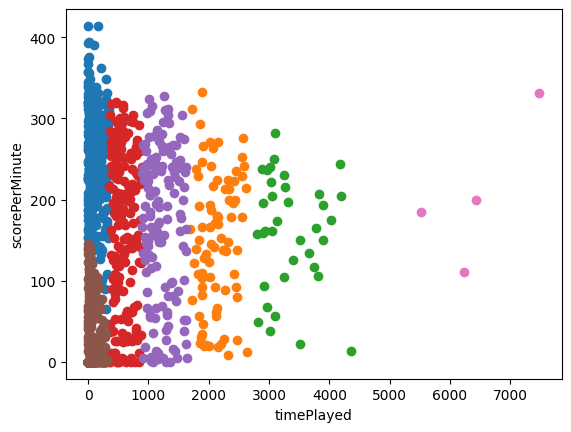

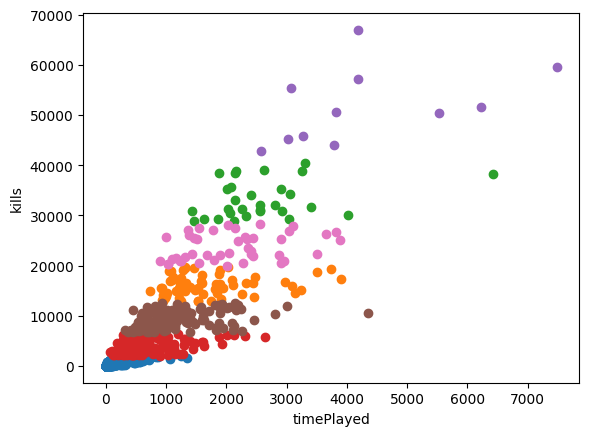

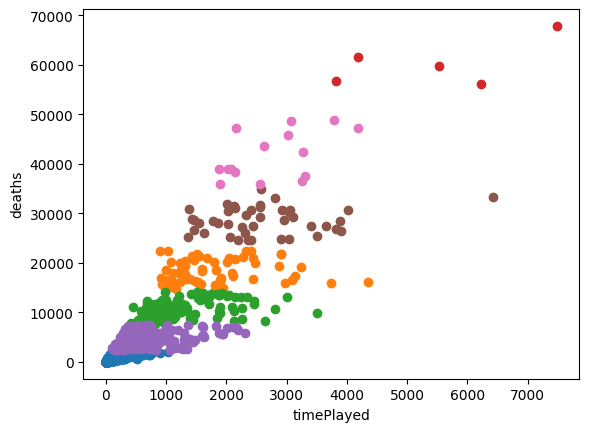

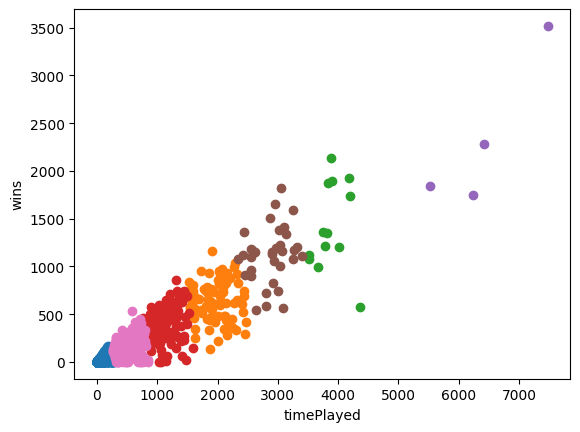

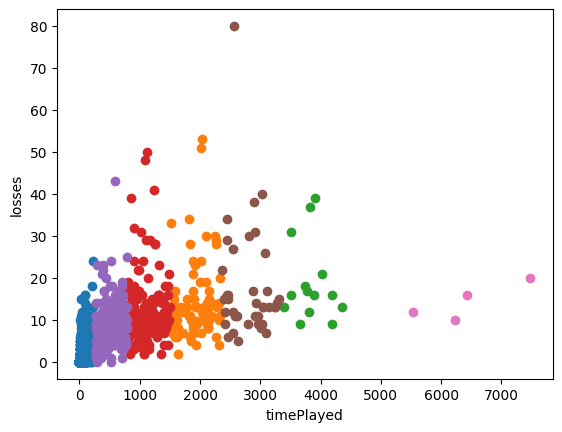

In [28]:
x = 'timePlayed'
cluster_2d(cod_data, x, 'scorePerMinute', 7)
cluster_2d(cod_data, x, 'kills', 7)
cluster_2d(cod_data, x, 'deaths', 7)
cluster_2d(cod_data, x, 'wins', 7)
cluster_2d(cod_data, x, 'losses', 7)

